In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pointbiserialr
from scipy.stats import spearmanr

import geopandas as gpd
from shapely.geometry import Point
import folium
from IPython.display import IFrame
import webbrowser

# Set options to show all columns
pd.set_option('display.max_columns', None)

# Upload csv file
data = r'C:\repos\immo-eliza-team6-analysis\data\clean\after_step_3b_outliers_cat.csv' # Fill your path to file
df = pd.read_csv(data, sep = ',')





In [233]:
# transform dtypes 'object' to 'category'
int_columns = df.select_dtypes(include=['object'])

for col in int_columns.columns:
    df[col] = df[col].astype('category')

df['Postal_code']= df['Postal_code'].astype('string')
df['post_1'] = df['Postal_code'].str[0]
df['post_2'] = df['Postal_code'].str[0:2]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5178 entries, 0 to 5177
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   id                         5178 non-null   int64   
 1   locality_name              5178 non-null   category
 2   Postal_code                5178 non-null   string  
 3   Price                      5178 non-null   int64   
 4   Subtype                    5178 non-null   category
 5   Number_of_bedrooms         5178 non-null   int64   
 6   Living_area                5178 non-null   int64   
 7   street                     5178 non-null   category
 8   number                     5162 non-null   category
 9   latitude                   5178 non-null   float64 
 10  longitude                  5178 non-null   float64 
 11  Open_fire                  5178 non-null   bool    
 12  Swimming_Pool              5178 non-null   bool    
 13  hasTerrace                 3479 n

In [206]:
df.describe(include='all')

,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,landSurface,price_per_sqm,price_per_sqm_land,Province,Assigned_City,Has_Assigned_City,Kitchen_type_encoded,State_of_building_encoded,EPC_encoded,post_1,post_2
count,5.178000e+03,5178,5178,5178.000000,5178,5178.000000,5178.000000,5178,5162,5178.000000,5178.000000,5178,5178,3479,5178.000000,5178.000000,5178,5178.000000,5178,5178,5178,5178.000000,5178.000000,5178.000000,5178,1462,5178,5178.000000,5178.000000,5178.000000,5178,5178
unique,NaN,1076,717,NaN,1,NaN,NaN,3798,604,NaN,NaN,2,2,1,NaN,NaN,4,NaN,5,2,6,NaN,NaN,NaN,11,10,2,NaN,NaN,NaN,9,79
top,NaN,Gent,9000,NaN,House,NaN,NaN,Stationsstraat,3,NaN,NaN,False,False,True,NaN,NaN,Installed,NaN,Good,False,F,NaN,NaN,NaN,East Flanders,Ghent,False,NaN,NaN,NaN,9,90
freq,NaN,172,137,NaN,5178,NaN,NaN,33,116,NaN,NaN,4932,5112,3479,NaN,NaN,3743,NaN,2529,5123,1224,NaN,NaN,NaN,1583,330,3716,NaN,NaN,NaN,1583,334
mean,1.909385e+07,NaN,NaN,357657.527037,NaN,3.293357,174.837968,NaN,NaN,50.882126,4.176423,NaN,NaN,NaN,24.763229,292.028389,NaN,2.887408,NaN,NaN,NaN,567.591348,2102.349529,1320.073395,NaN,NaN,NaN,1.334106,1.933372,2.232908,NaN,NaN
std,2.915249e+06,NaN,NaN,135666.678717,NaN,0.918695,53.153640,NaN,NaN,0.325057,0.766724,NaN,NaN,NaN,26.365149,483.719567,NaN,0.732712,NaN,NaN,NaN,1128.813969,683.764284,1351.187148,NaN,NaN,NaN,0.739095,1.247444,1.644297,NaN,NaN
min,9.542242e+06,NaN,NaN,40000.000000,NaN,1.000000,27.000000,NaN,NaN,49.507785,2.585809,NaN,NaN,NaN,1.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,10.000000,352.352941,13.550136,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN
25%,2.011527e+07,NaN,NaN,259000.000000,NaN,3.000000,138.000000,NaN,NaN,50.783776,3.630812,NaN,NaN,NaN,23.000000,220.000000,NaN,2.000000,NaN,NaN,NaN,201.250000,1604.477612,543.649603,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN
50%,2.019316e+07,NaN,NaN,349000.000000,NaN,3.000000,169.000000,NaN,NaN,50.936206,4.129818,NaN,NaN,NaN,23.000000,220.000000,NaN,3.000000,NaN,NaN,NaN,412.000000,2056.514793,917.976995,NaN,NaN,NaN,1.000000,2.000000,2.000000,NaN,NaN
75%,2.022748e+07,NaN,NaN,439000.000000,NaN,4.000000,204.000000,NaN,NaN,51.086637,4.609582,NaN,NaN,NaN,23.000000,220.000000,NaN,3.000000,NaN,NaN,NaN,575.000000,2566.176471,1577.521202,NaN,NaN,NaN,1.000000,2.000000,3.000000,NaN,NaN


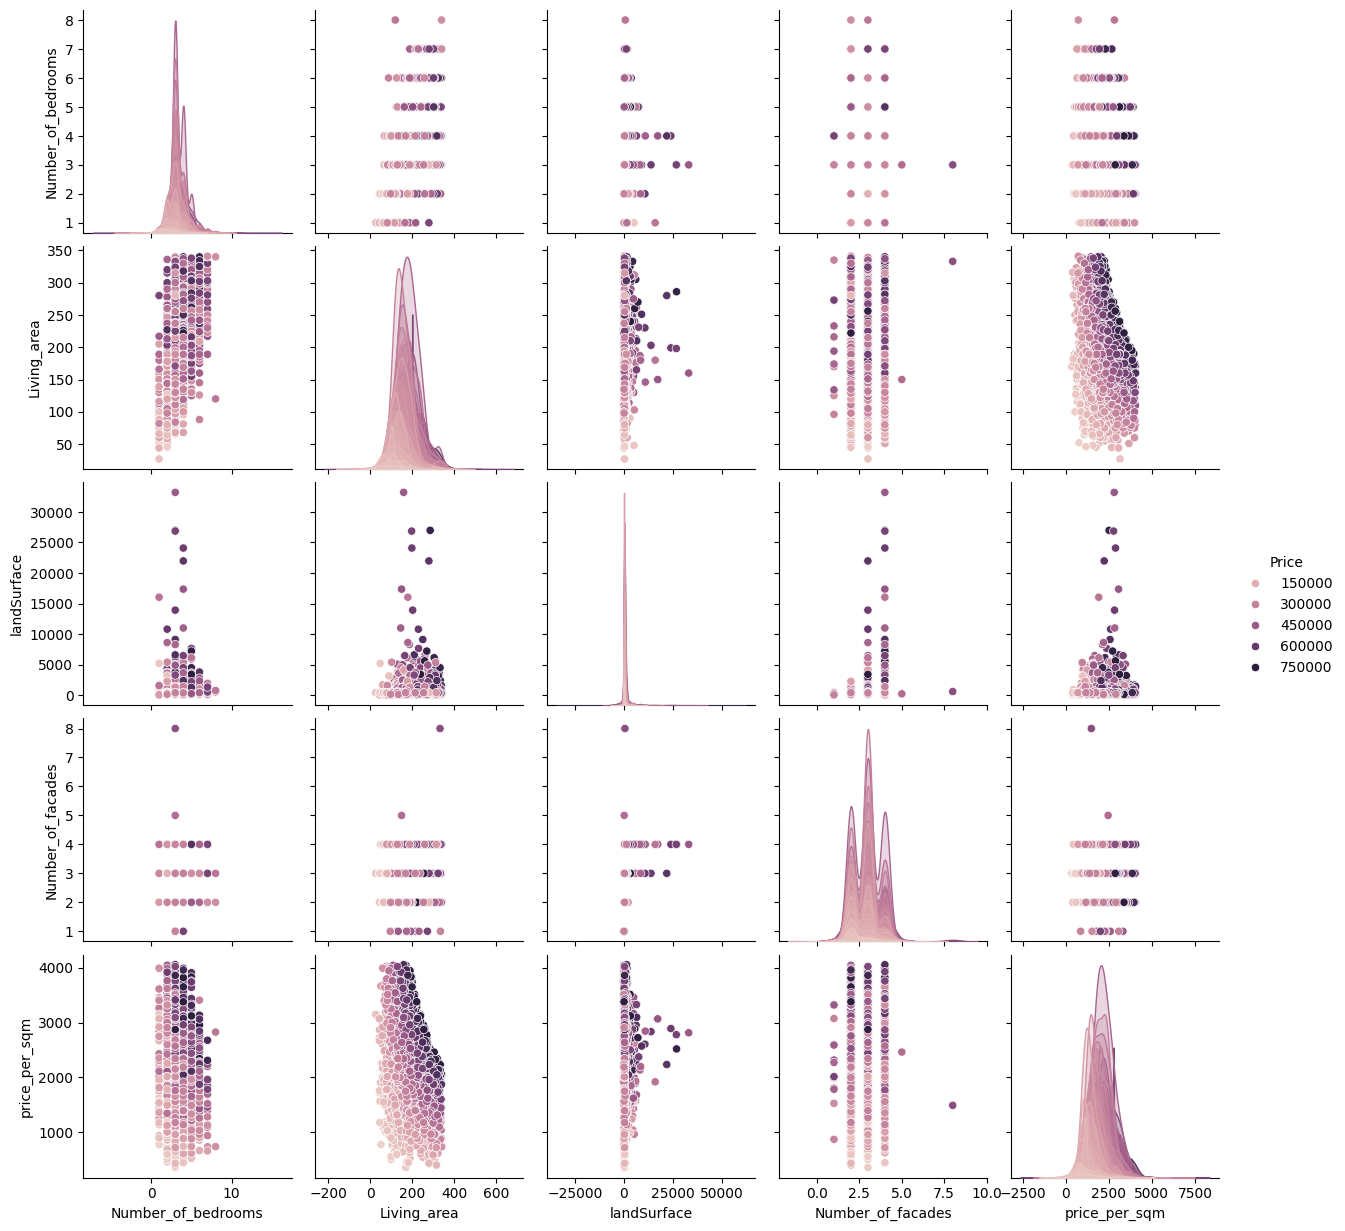

In [207]:
cols_to_plot = ['Number_of_bedrooms', 'Living_area', 'landSurface', 'Number_of_facades', 'price_per_sqm', 'Price']
sns.pairplot(df[cols_to_plot], hue='Price')
plt.show()



In [208]:
# Ensure 'Postal_code' is converted to integer for comparison
df['Postal_code'] = df['Postal_code'].astype(int)

# Apply the first condition: Flanders or Wallonie
df['region'] = df['Postal_code'].apply(
    lambda x: 'Flanders' if (1500 <= x < 4000) or (8000 <= x <= 9999) else 'Wallonie'
)

# Update 'region' to 'Brussels' for specific postal codes (compare integers)
df['region'] = df.apply(
    lambda row: 'Brussels' if 1000 <= row['Postal_code'] < 1300 else row['region'], axis=1
)
# Display the first few rows
df.head()

,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,landSurface,price_per_sqm,price_per_sqm_land,Province,Assigned_City,Has_Assigned_City,Kitchen_type_encoded,State_of_building_encoded,EPC_encoded,post_1,post_2,region
0,20252354,Ronse,9600,319000,House,3,125,Rotterij,148,50.744176,3.625722,False,False,True,23,370,Installed,4,To renovate,False,F,767,2552.000000,415.906128,East Flanders,NaN,False,1,0,0,9,96,Flanders
1,20251003,Geraardsbergen,9500,299999,House,3,167,Pirrestraat,17,50.752121,3.925495,False,False,True,23,895,Installed,2,Good,False,D,1050,1796.401198,285.713333,East Flanders,NaN,False,1,2,2,9,95,Flanders
2,20252002,Mechelen,2800,275000,House,3,154,Caputsteenstraat,150,51.033269,4.491795,False,False,True,10,20,Semi equipped,2,To renovate,False,E,120,1785.714286,2291.666667,Antwerp,NaN,False,2,0,1,2,28,Flanders
3,20252352,Gooik,1755,295000,House,3,172,Strijlandstraat,45,50.791877,4.084293,False,False,True,23,300,Installed,3,To renovate,False,F,309,1715.116279,954.692557,Brabant_Wallon,NaN,False,1,0,0,1,17,Flanders
4,20251715,Dilbeek,1700,715000,House,3,280,Herdebeekstraat 94-94A,0,50.840610,4.228425,False,True,True,36,374,Installed,3,As new,False,C,374,2553.571429,1911.764706,Brabant_Wallon,NaN,False,1,4,3,1,17,Flanders


[(0.0, 900000.0)]

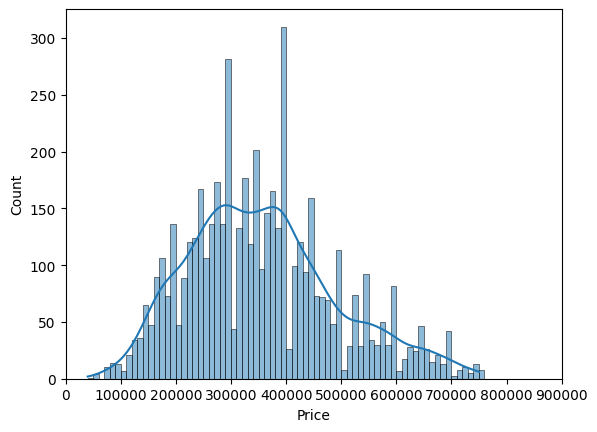

In [209]:
plotx= sns.histplot(df, x= 'Price', kde=True, binwidth=10000, binrange=(0, 900000)
                    )
plotx.set(xlim=(0, 900000))

[(0.0, 100000.0)]

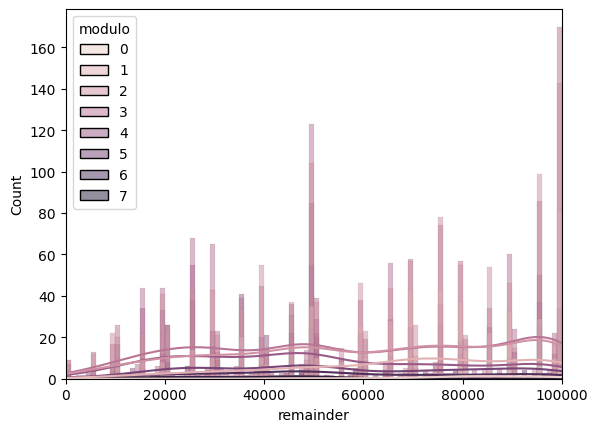

In [210]:
df['remainder'] = df['Price'] % 100000
df['modulo'] = df['Price'] // 100000

plotx= sns.histplot(df, x= 'remainder', kde=True, binwidth=1000, binrange=(0, 900000), hue = 'modulo'
                    )
plotx.set(xlim=(0, 100000))

In [211]:
print(df.columns)


Index(['id', 'locality_name', 'Postal_code', 'Price', 'Subtype',
       'Number_of_bedrooms', 'Living_area', 'street', 'number', 'latitude',
       'longitude', 'Open_fire', 'Swimming_Pool', 'hasTerrace',
       'terraceSurface', 'gardenSurface', 'Kitchen_type', 'Number_of_facades',
       'State_of_building', 'Furnished', 'epc', 'landSurface', 'price_per_sqm',
       'price_per_sqm_land', 'Province', 'Assigned_City', 'Has_Assigned_City',
       'Kitchen_type_encoded', 'State_of_building_encoded', 'EPC_encoded',
       'post_1', 'post_2', 'region', 'remainder', 'modulo'],
      dtype='object')


<Axes: xlabel='region', ylabel='Count'>

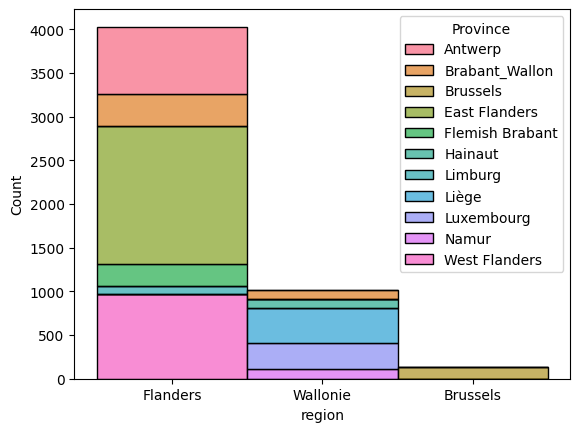

In [212]:
df_sorted = df.sort_values(by='post_1')
sns.histplot(df_sorted, x= 'region', hue = "Province", multiple="stack")



Text(0.5, 1.0, 'Price Distribution by kitchen type (normalized)')

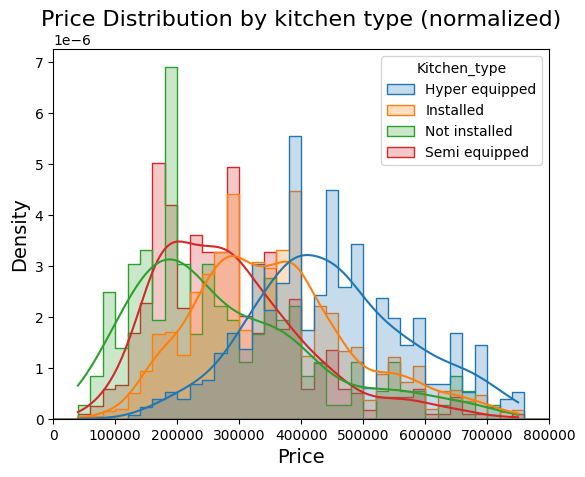

In [213]:
plotx= sns.histplot(df, x= 'Price', kde=True, hue = "Kitchen_type", binwidth=20000, binrange=(0, 1000000), stat='density', element = "step", common_norm=False)

plotx.set(xlim=(0, 800000))

# Set labels and title
plotx.set_xlabel('Price', fontsize=14)
plotx.set_ylabel('Density', fontsize=14)
plotx.set_title('Price Distribution by kitchen type (normalized)', fontsize=16)

In [214]:
grouped_counts = df.groupby('Kitchen_type').size()
print(grouped_counts)

Kitchen_type
Hyper equipped     657
Installed         3743
Not installed      181
Semi equipped      597
dtype: int64


C:\Users\petra\AppData\Local\Temp\ipykernel_71632\1834243117.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = df.groupby('Kitchen_type').size()


Text(0.5, 1.0, 'Price Distribution by State of building (normalized)')

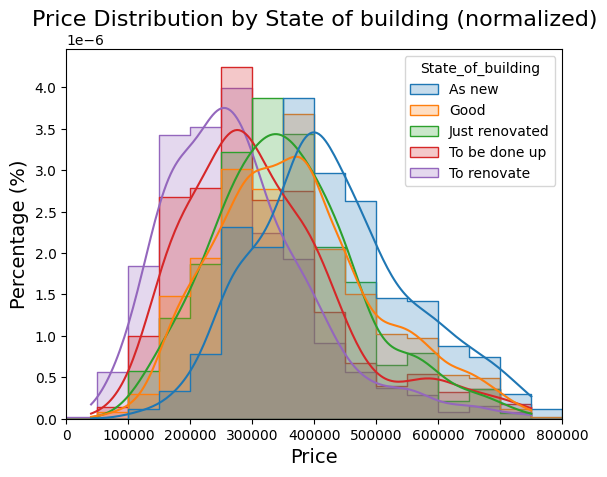

In [215]:
plotx= sns.histplot(df, x= 'Price', kde=True, hue = "State_of_building", binwidth=50000, binrange=(0, 1000000), stat='density', element = "step", common_norm=False)

plotx.set(xlim=(0, 800000))

# Set labels and title
plotx.set_xlabel('Price', fontsize=14)
plotx.set_ylabel('Percentage (%)', fontsize=14)
plotx.set_title('Price Distribution by State of building (normalized)', fontsize=16)

In [216]:
grouped_counts = df.groupby('State_of_building').size()
print(grouped_counts)

State_of_building
As new             889
Good              2529
Just renovated     279
To be done up      560
To renovate        921
dtype: int64


C:\Users\petra\AppData\Local\Temp\ipykernel_71632\695626291.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = df.groupby('State_of_building').size()


Text(0.5, 1.0, 'Price Distribution by region (normalized)')

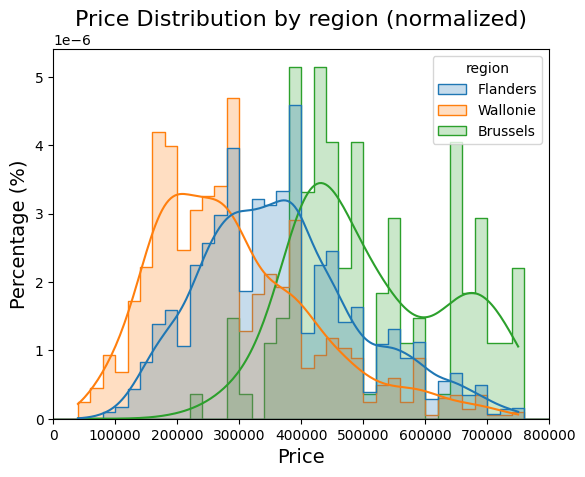

In [217]:
plotx= sns.histplot(df, x= 'Price', kde=True, hue = "region", binwidth=20000, binrange=(0, 1000000), stat='density', element = "step", common_norm=False)

plotx.set(xlim=(0, 800000))

# Set labels and title
plotx.set_xlabel('Price', fontsize=14)
plotx.set_ylabel('Percentage (%)', fontsize=14)
plotx.set_title('Price Distribution by region (normalized)', fontsize=16)

Has_Assigned_City
False    3716
True     1462
Name: count, dtype: int64


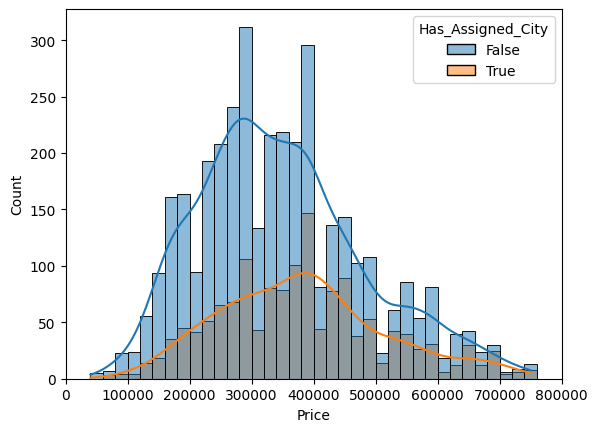

In [218]:
df['Has_Assigned_City'] = df['Has_Assigned_City']
plotx= sns.histplot(df, x= 'Price', kde=True, hue = "Has_Assigned_City", binwidth=20000, binrange=(0, 1000000), alpha=0.5)
plotx.set(xlim=(0, 800000))

print(df['Has_Assigned_City'].value_counts())


[(0.0, 800000.0)]

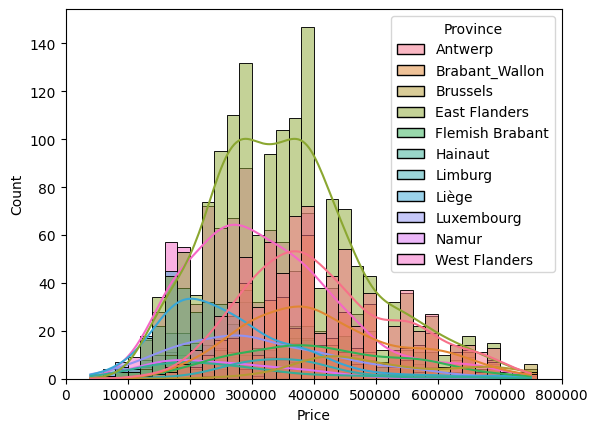

In [219]:
#flanders_df = df[df['region'] == "Flanders"]

plotx= sns.histplot(df, x= 'Price', kde=True, hue = "Province", binwidth=20000, binrange=(0, 1000000), alpha=0.5)
plotx.set(xlim=(0, 800000))



[(0.0, 800000.0)]

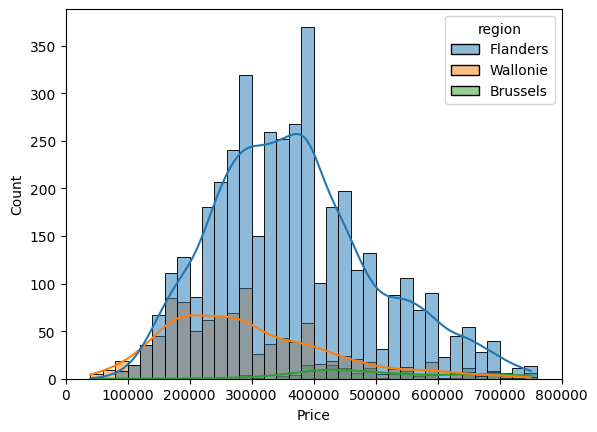

In [220]:
plotx= sns.histplot(df, x= 'Price', kde=True, hue = "region", binwidth=20000, binrange=(0, 1000000))
plotx.set(xlim=(0, 800000))

In [221]:

# Group by region and postal code, then calculate the average price
avg_price_per_postal_code = df.groupby(['region', 'Postal_code'])['Price'].mean().reset_index()

# Find the postal code with the highest average price per region
max_avg_price_per_region = avg_price_per_postal_code.loc[
    avg_price_per_postal_code.groupby('region')['Price'].idxmax()
]

# Display the result
print(max_avg_price_per_region)



       region  Postal_code     Price
5    Brussels         1060  672000.0
173  Flanders         3054  720000.0
649  Wallonie         6921  750000.0


In [222]:
# Step 1: Filter postal codes with at least 5 records
postal_code_counts = avg_price_per_postal_code['Postal_code'].value_counts()
valid_postal_codes = postal_code_counts[postal_code_counts >= 5].index

filtered_data = avg_price_per_postal_code[avg_price_per_postal_code['Postal_code'].isin(valid_postal_codes)]

# Step 2: Get max avg price per region
max_avg_price_per_region = filtered_data.loc[
    filtered_data.groupby('region')['Price'].idxmax()
]

print(max_avg_price_per_region)

Empty DataFrame
Columns: [region, Postal_code, Price]
Index: []


In [223]:
# Group by region and postal code, then calculate the median price
median_price_per_postal_code = df.groupby(['region', 'Postal_code'])['Price'].median().reset_index()

# Find the postal code with the highest median price per region
max_median_price_per_region = median_price_per_postal_code.loc[
    median_price_per_postal_code.groupby('region')['Price'].idxmax()
]

# Display the result
print(max_median_price_per_region)

       region  Postal_code     Price
14   Brussels         1150  696500.0
173  Flanders         3054  720000.0
649  Wallonie         6921  750000.0


In [224]:
df_filtered = df[df['Postal_code'] == '1000']
df_filtered.head()

,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,landSurface,price_per_sqm,price_per_sqm_land,Province,Assigned_City,Has_Assigned_City,Kitchen_type_encoded,State_of_building_encoded,EPC_encoded,post_1,post_2,region,remainder,modulo


In [225]:
# Group by region and postal code, then calculate the average price per sqm
avg_price_per_sqm_per_postal_code = df.groupby(['region', 'Postal_code'])['price_per_sqm'].mean().reset_index()

# Find the postal code with the highest average price per region
max_avg_price_per_sqm_per_region = avg_price_per_sqm_per_postal_code.loc[
    avg_price_per_sqm_per_postal_code.groupby('region')['price_per_sqm'].idxmax()
]

# Display the result
print(max_avg_price_per_sqm_per_region)

       region  Postal_code  price_per_sqm
14   Brussels         1150    3370.935156
181  Flanders         3111    3613.861386
460  Wallonie         1460    3384.615385


In [226]:
# Group by region and calculate the average house price
avg_price_per_region = df.groupby('region')['Price'].mean().reset_index()

# Optional: Format the price values for readability
avg_price_per_region['Price'] = avg_price_per_region['Price'].map('{:,.2f}'.format)

# Display the result
print(avg_price_per_region)

## 


     region       Price
0  Brussels  513,102.94
1  Flanders  368,749.44
2  Wallonie  292,747.45


https://postcode.nationaal.be/

https://www.notaris.be/vastgoedprijzen

tgoedprijzen

In [227]:
# Group by region and calculate the average house price
avg_price_per_sqm_per_region = df.groupby('region')['price_per_sqm'].mean().reset_index()

# Optional: Format the price values for readability
avg_price_per_sqm_per_region['price_per_sqm'] = avg_price_per_sqm_per_region['price_per_sqm'].map('{:,.2f}'.format)

# Display the result
print(avg_price_per_sqm_per_region)

     region price_per_sqm
0  Brussels      2,738.99
1  Flanders      2,141.69
2  Wallonie      1,860.67


In [228]:
# Group by region and calculate the average house price
avg_price_per_sqm_per_region = df.groupby('region')['price_per_sqm'].mean().reset_index()

# Optional: Format the price values for readability
avg_price_per_sqm_per_region['price_per_sqm'] = avg_price_per_sqm_per_region['price_per_sqm'].map('{:,.2f}'.format)

# Display the result
print(avg_price_per_sqm_per_region)

     region price_per_sqm
0  Brussels      2,738.99
1  Flanders      2,141.69
2  Wallonie      1,860.67


C:\Users\petra\AppData\Local\Temp\ipykernel_71632\1844226920.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Province")


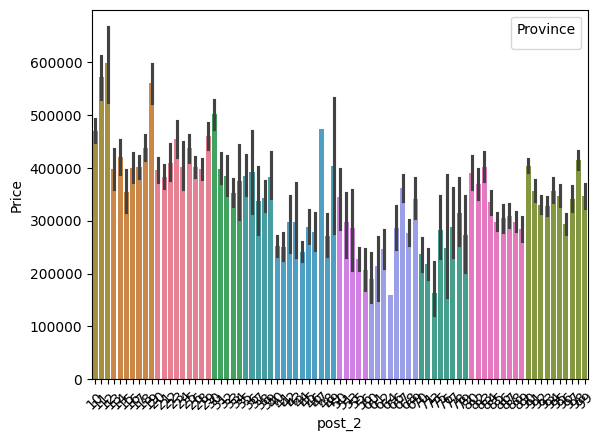

In [253]:
sorted_df = df.sort_values(by='post_2')
sns.barplot(x='post_2', y='Price', data=sorted_df, estimator='mean', hue = 'Province',legend = False )  # You can use 'sum', 'median', etc.
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.legend(title="Province") 
plt.show()

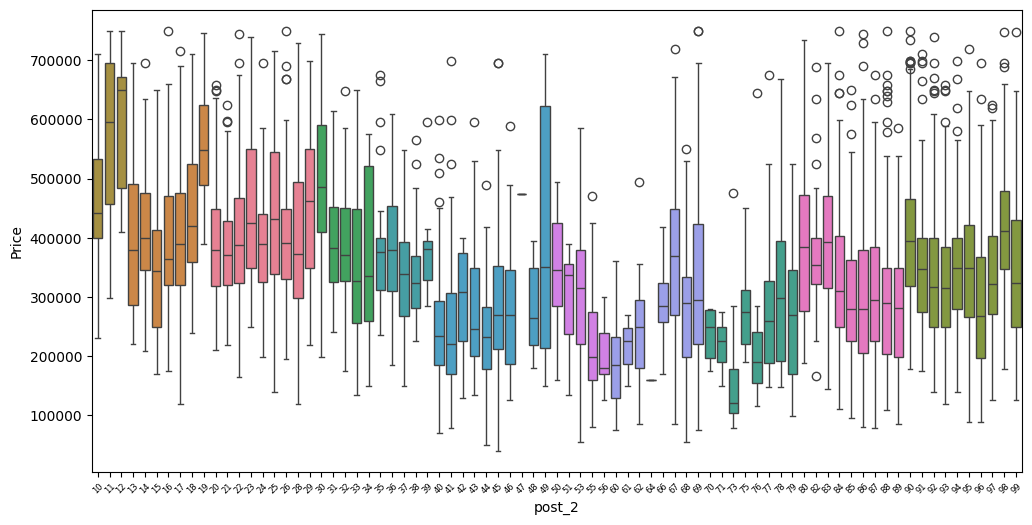

In [264]:
plt.figure(figsize=(12, 6))
plot = sns.boxplot(x='post_2', y='Price', data=sorted_df,  hue = 'Province',legend = False)
plt.xticks(rotation=45, fontsize=6)
plt.show()


<Figure size 200x200 with 0 Axes>

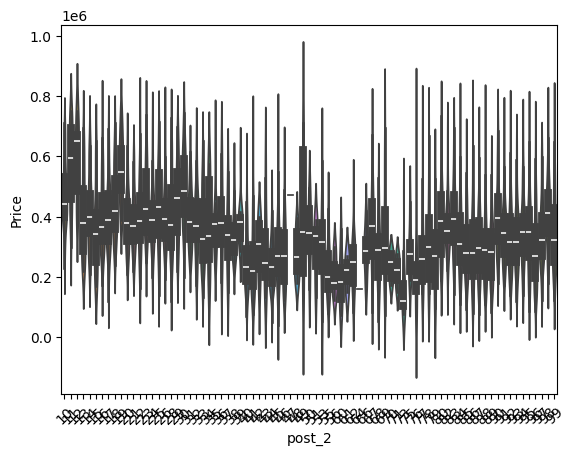

In [255]:
sns.violinplot(x='post_2', y='Price', data=sorted_df,  hue = 'Province',legend = False)
plt.xticks(rotation=45, fontsize=8)
plt.show()

c:\repos\immo-eliza-team6-analysis\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 82.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\repos\immo-eliza-team6-analysis\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 82.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\repos\immo-eliza-team6-analysis\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 85.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\repos\immo-eliza-team6-analysis\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\repos\immo-eliza-team6-analysis\.venv

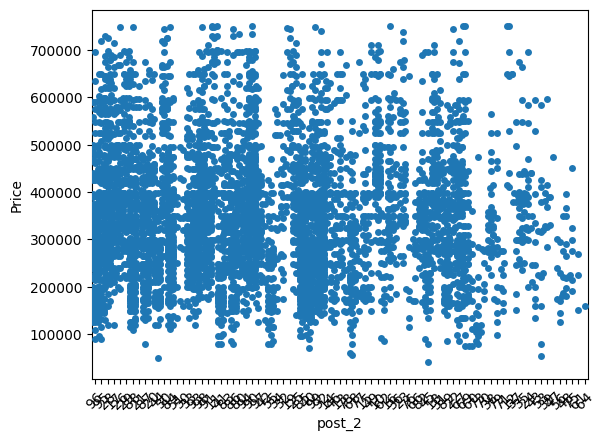

In [240]:
sns.swarmplot(x='post_2', y='Price', data=sorted_df)
plt.xticks(rotation=45)
plt.show()

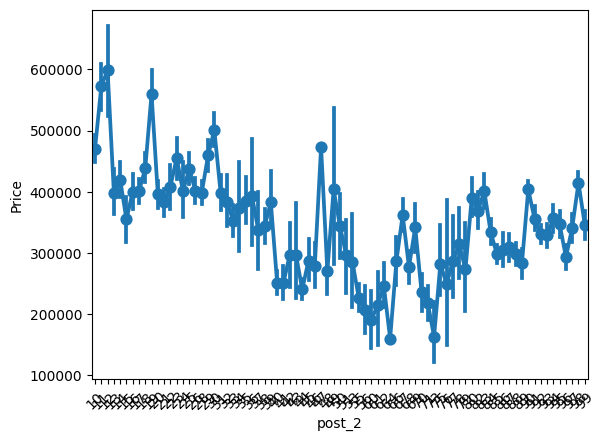

In [246]:
sns.pointplot(x='post_2', y='Price', data=sorted_df, estimator='mean')
plt.xticks(rotation=45)
plt.show()